In [1]:
import matplotlib.pyplot as plt
import numpy as np
import math
import matplotlib as mpl
from scipy import ndimage
from PIL import Image


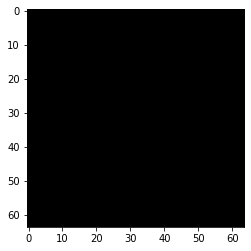

In [2]:
img=np.zeros((64,64))
plt.imshow(img,cmap='gray')

In [3]:
def pad_with(vector, pad_width, iaxis, kwargs):
    pad_value = kwargs.get('padder', 10)
    vector[:pad_width[0]] = pad_value
    vector[-pad_width[1]:] = pad_value

In [4]:
input_img = np.pad(img, 32, pad_with, padder=1)

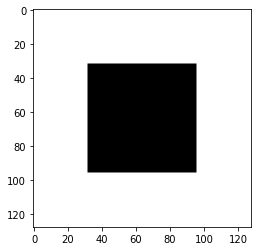

In [5]:
plt.imshow(input_img,cmap='gray')

## SHEAR

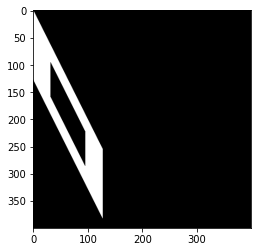

In [6]:
#The following code snippet is influenced by the blog 
#https://stackabuse.com/affine-image-transformations-in-python-with-numpy-pillow-and-opencv/

ShearMatrix = np.array([[1,2],[0,1]])
res = np.zeros((400,400))

for i,row in enumerate(input_img):
    for j, col in enumerate(row):
        pixel_data = input_img[i, j]
        input_coords = np.array([i, j])
        i_out, j_out = np.round(ShearMatrix @ input_coords)
        res[i_out,j_out] = pixel_data
        
plt.imshow(res,cmap='gray')

## ROTATION

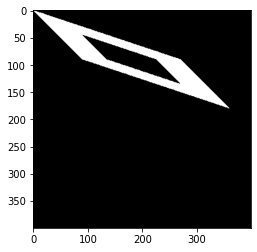

In [7]:
#The following code snippet is adopted from the following link, necessary changes are made
#https://stackoverflow.com/questions/57648391/how-do-i-rotate-an-image-manually-without-using-cv2-getrotationmatrix2d


#  inputs
rotation_amount_degree = 45

#  convert rotation amount to radian
rotation_amount_rad = rotation_amount_degree * np.pi / 180.0


#  get dimension info
height, width = res.shape

max_len=400
rotated_image = np.zeros((max_len, max_len))

rotated_height, rotated_width= rotated_image.shape
mid_row = int( (rotated_height+1)/2 )
mid_col = int( (rotated_width+1)/2 )

for r in range(rotated_height):
    for c in range(rotated_width):
        
        y = (r)*math.cos(rotation_amount_rad) + (c)*math.sin(rotation_amount_rad)
        x = -1*(r)*math.sin(rotation_amount_rad) + (c)*math.cos(rotation_amount_rad)

        #  get nearest index
        #a better way is linear interpolation
        x = round(x)
        y = round(y)

        if (x >= 0 and y >= 0 and x < width and y < height):
            rotated_image[r][c] = res[y][x]


plt.imshow(rotated_image,cmap='gray')

## MAGNIFICATION

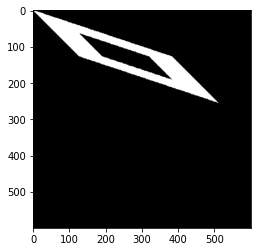

In [8]:
import numpy as np
import math
from scipy import ndimage
from PIL import Image


height, width = rotated_image.shape


max_len=600
magnified_image = np.zeros((max_len, max_len))

rotated_height, rotated_width= magnified_image.shape

for r in range(rotated_height):
    for c in range(rotated_width):
        
        y = (r)*(1/math.sqrt(2)) 
        x = (c)*(1/math.sqrt(2))

        x = round(x)
        y = round(y)

        #  check if x/y corresponds to a valid pixel in input image
        if (x >= 0 and y >= 0 and x < width and y < height):
            magnified_image[r][c] = rotated_image[y][x]


plt.imshow(magnified_image,cmap='gray')

## TRANSLATION

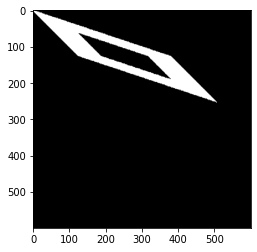

In [9]:
import numpy as np
import math
from scipy import ndimage
from PIL import Image


height, width = magnified_image.shape

max_len=600
translated = np.zeros((max_len, max_len))

rotated_height, rotated_width= translated.shape

for r in range(rotated_height):
    for c in range(rotated_width):
        
        y = (r)+1
        x = (c)+3

        x = round(x)
        y = round(y)
        #  check if x/y corresponds to a valid pixel in input image
        if (x >= 0 and y >= 0 and x < width and y < height):
            translated[r][c] = magnified_image[y][x]


plt.imshow(translated,cmap='gray')